In [1]:
#191805004 Meltem Altınkaynak

#13-classification_human activity recongnition

# 1) dataset review

In [2]:
import pandas as pd

dosya_yolu = 'C:\\Users\\Admin\\Desktop\\dataset\\12-classification+UL_learning styles and class activities\\Dataset ML.xls'
data = pd.read_excel(dosya_yolu)
print(data.head(10)) 


  Öğrenci No  Cinsiyet  Doğum Yılı  Okul Türü  Sınıf Düzeyi  Baba Mesleği  \
0      1-100       1.0        92.0          3             9          12.0   
1      1-102       2.0        92.0          3             9          12.0   
2      1-103       2.0        92.0          3             9          11.0   
3      1-105       1.0        92.0          3             9          12.0   
4      1-106       2.0        92.0          3             9          15.0   
5      1-107       1.0        92.0          3             9          13.0   
6      1-108       1.0        92.0          3             9          15.0   
7      1-109       2.0        92.0          3             9          12.0   
8      1-110       2.0        92.0          3             9          13.0   
9      1-112       1.0        90.0          3             9           NaN   

   Baba Eğitim Düzeyi  Anne Mesleği  Anne Eğitim Düzeyi  Kardeş Sayısı  ...  \
0                 2.0          12.0                 2.0            0.0  .

In [3]:
print(data.shape)

(1007, 163)


In [4]:
print(data.columns)

Index(['Öğrenci No', 'Cinsiyet', 'Doğum Yılı', 'Okul Türü', 'Sınıf Düzeyi',
       'Baba Mesleği', 'Baba Eğitim Düzeyi', 'Anne Mesleği',
       'Anne Eğitim Düzeyi', 'Kardeş Sayısı',
       ...
       'c11', 'c12', 'CE', 'RO', 'AC', 'AE', 'CE-AC', 'RO-AE', 'lst', 'pass'],
      dtype='object', length=163)


In [5]:
print(data.dtypes)
print("Sütun sayısı:",len(data.columns))

Öğrenci No       object
Cinsiyet        float64
Doğum Yılı      float64
Okul Türü         int64
Sınıf Düzeyi      int64
                 ...   
AE                int64
CE-AC           float64
RO-AE             int64
lst               int64
pass              int64
Length: 163, dtype: object
Sütun sayısı: 163


# 2) data cleaning and data type conversions

In [6]:
# Öğrenci No çıkarıyoruz
data = data.drop(columns=['Öğrenci No'])

In [7]:
import pandas as pd


# Sütunların veri tiplerini öğren
veri_tipleri = data[["Cinsiyet", "Doğum Yılı", "Okul Türü", "Sınıf Düzeyi", "Baba Mesleği", "Baba Eğitim Düzeyi",
            "Anne Mesleği", "Anne Eğitim Düzeyi", "Kardeş Sayısı", "Kitap Sayısı", "Evde Bilgisayar",
            "Evde İnternet", "Evde Çalışma Odası", "Sınıf 9 Notu", "Sınıf 10 Notu", "Sınıf 11 Notu",
            "Not Ortalaması aps", "Ders Dinleme Önemi", "Ders Çalışma Önemi", "Ödev Yapma Önemi",
            "Okul Kursu Önemi", "Özel Ders Sıklığı", "Drsn Fizik Sıklığı", "Drsn ÖSS Sıklığı",
            "En sevilen konu"]].dtypes

print(veri_tipleri)




Cinsiyet              float64
Doğum Yılı            float64
Okul Türü               int64
Sınıf Düzeyi            int64
Baba Mesleği          float64
Baba Eğitim Düzeyi    float64
Anne Mesleği          float64
Anne Eğitim Düzeyi    float64
Kardeş Sayısı         float64
Kitap Sayısı          float64
Evde Bilgisayar       float64
Evde İnternet         float64
Evde Çalışma Odası    float64
Sınıf 9 Notu          float64
Sınıf 10 Notu         float64
Sınıf 11 Notu         float64
Not Ortalaması aps    float64
Ders Dinleme Önemi    float64
Ders Çalışma Önemi    float64
Ödev Yapma Önemi      float64
Okul Kursu Önemi      float64
Özel Ders Sıklığı       int64
Drsn Fizik Sıklığı    float64
Drsn ÖSS Sıklığı      float64
En sevilen konu       float64
dtype: object


In [8]:
# veri tipi değişimleri
kategorik_sutunlar = ["Evde Bilgisayar", "Evde İnternet", "Evde Çalışma Odası", "Cinsiyet"]

for sutun in kategorik_sutunlar:
    data[sutun] = data[sutun].astype("category")

In [15]:
# lst targetlardan birisi ve bunu da sınıflandırma için kategorik yapıyoruz)
data["lst"] = data["lst"].astype("category")

In [9]:
import pandas as pd


# Sütunların veri tiplerini öğren
veri_tipleri = data[["Cinsiyet", "Doğum Yılı", "Okul Türü", "Sınıf Düzeyi", "Baba Mesleği", "Baba Eğitim Düzeyi",
            "Anne Mesleği", "Anne Eğitim Düzeyi", "Kardeş Sayısı", "Kitap Sayısı", "Evde Bilgisayar",
            "Evde İnternet", "Evde Çalışma Odası", "Sınıf 9 Notu", "Sınıf 10 Notu", "Sınıf 11 Notu",
            "Not Ortalaması aps", "Ders Dinleme Önemi", "Ders Çalışma Önemi", "Ödev Yapma Önemi",
            "Okul Kursu Önemi", "Özel Ders Sıklığı", "Drsn Fizik Sıklığı", "Drsn ÖSS Sıklığı",
            "En sevilen konu"]].dtypes

print(veri_tipleri)

Cinsiyet              category
Doğum Yılı             float64
Okul Türü                int64
Sınıf Düzeyi             int64
Baba Mesleği           float64
Baba Eğitim Düzeyi     float64
Anne Mesleği           float64
Anne Eğitim Düzeyi     float64
Kardeş Sayısı          float64
Kitap Sayısı           float64
Evde Bilgisayar       category
Evde İnternet         category
Evde Çalışma Odası    category
Sınıf 9 Notu           float64
Sınıf 10 Notu          float64
Sınıf 11 Notu          float64
Not Ortalaması aps     float64
Ders Dinleme Önemi     float64
Ders Çalışma Önemi     float64
Ödev Yapma Önemi       float64
Okul Kursu Önemi       float64
Özel Ders Sıklığı        int64
Drsn Fizik Sıklığı     float64
Drsn ÖSS Sıklığı       float64
En sevilen konu        float64
dtype: object


In [16]:
print(data.isnull().sum())

Cinsiyet         1
Doğum Yılı       1
Okul Türü        0
Sınıf Düzeyi     0
Baba Mesleği    28
                ..
AE               0
CE-AC            0
RO-AE            0
lst              0
pass             0
Length: 162, dtype: int64


In [17]:
null_counts = data.isnull().sum()
null_columns = null_counts[null_counts != 0]
print(null_columns)

Cinsiyet               1
Doğum Yılı             1
Baba Mesleği          28
Baba Eğitim Düzeyi    14
Anne Mesleği          11
                      ..
c8                    10
c9                    12
c10                    8
c11                   13
c12                    9
Length: 150, dtype: int64


In [ ]:
# target sütununun eksik değere sahip satırlarını siliyoruz

In [18]:
print(data['Not Ortalaması aps'].isnull().sum())  #bu target 

29


In [21]:
cleaned_data = data.dropna(subset=['Not Ortalaması aps'])

In [22]:
print(cleaned_data['Not Ortalaması aps'].isnull().sum())  #bu target 

0


In [26]:
# diğer eksik değer içeren sütunları en sık tekrar eden değerle dolduruyoruz
for column in cleaned_data.columns:
    most_frequent_value = cleaned_data[column].mode()[0]  
    cleaned_data[column].fillna(most_frequent_value, inplace=True) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_8148\2770274992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column].fillna(most_frequent_value, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8148\2770274992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column].fillna(most_frequent_value, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8148\2770274992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [30]:
total_missing = cleaned_data.isnull().sum().sum()

print(total_missing)

0


# 3) Histograms , Plots

In [31]:
yeni_data = cleaned_data.copy()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


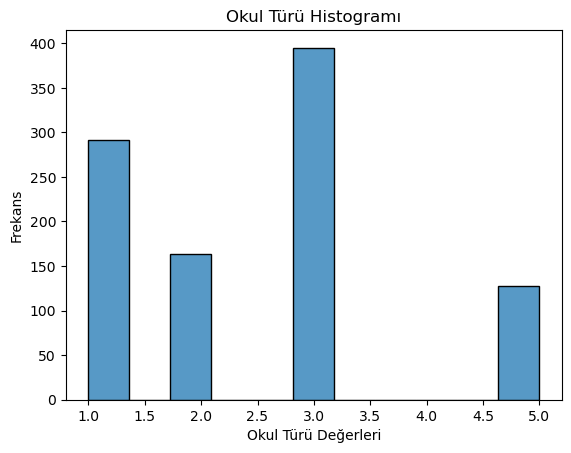

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


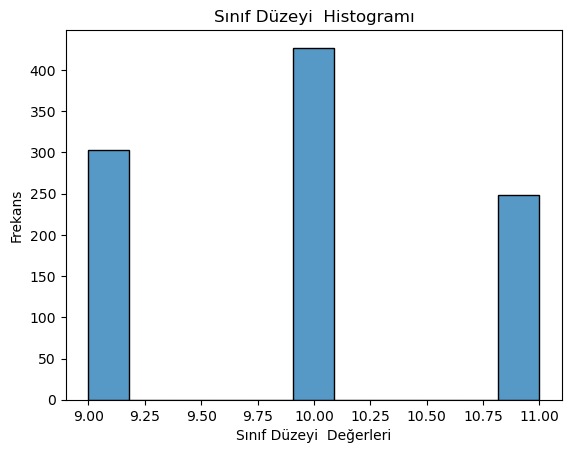

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


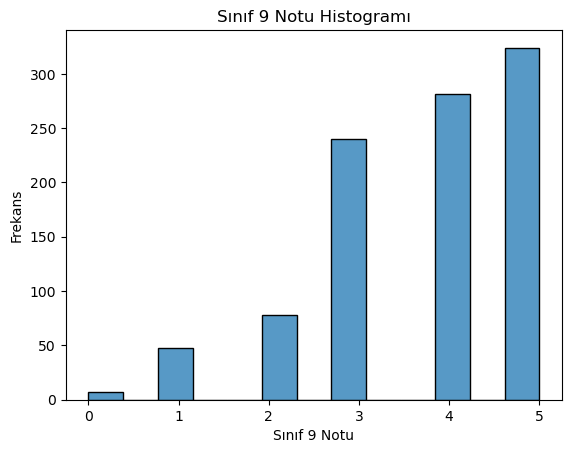

In [33]:
# gyro sütunları 
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=yeni_data, x='Okul Türü')
plt.xlabel('Okul Türü Değerleri')
plt.ylabel('Frekans')
plt.title('Okul Türü Histogramı')
plt.show()


sns.histplot(data=yeni_data, x='Sınıf Düzeyi')
plt.xlabel('Sınıf Düzeyi  Değerleri')
plt.ylabel('Frekans')
plt.title('Sınıf Düzeyi  Histogramı')
plt.show()


sns.histplot(data=yeni_data, x='Sınıf 9 Notu')
plt.xlabel('Sınıf 9 Notu')
plt.ylabel('Frekans')
plt.title('Sınıf 9 Notu Histogramı')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


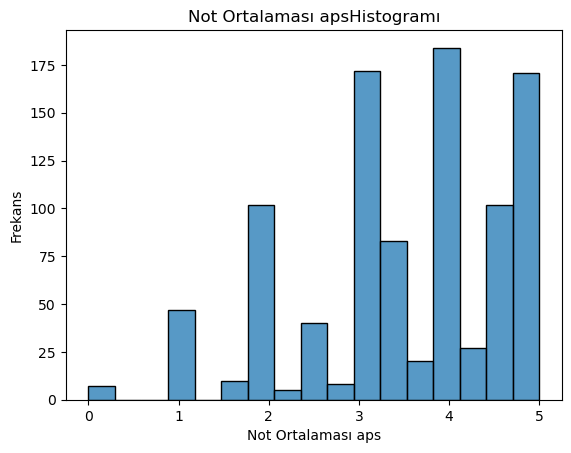

In [40]:
# output sütunu


sns.histplot(data=yeni_data, x='Not Ortalaması aps')
plt.xlabel('Not Ortalaması aps')
plt.ylabel('Frekans')
plt.title('Not Ortalaması apsHistogramı')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


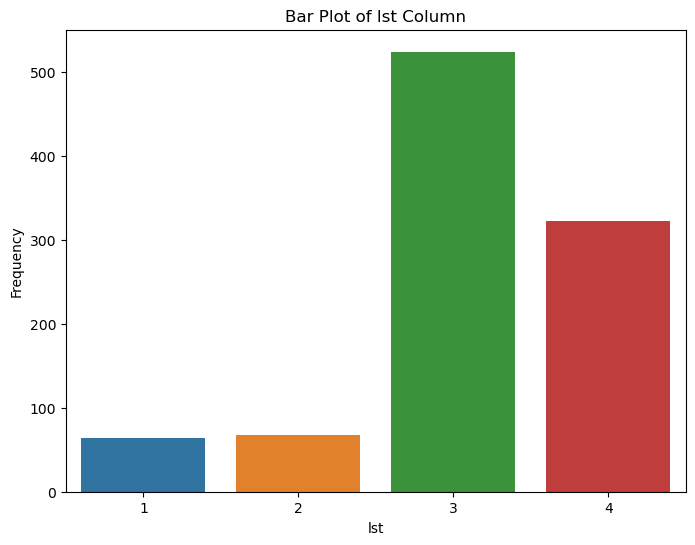

In [39]:
# output sütunu

output_counts = yeni_data['lst'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=output_counts.index, y=output_counts.values)
plt.xlabel('lst')
plt.ylabel('Frequency')
plt.title('Bar Plot of lst Column')
plt.show()

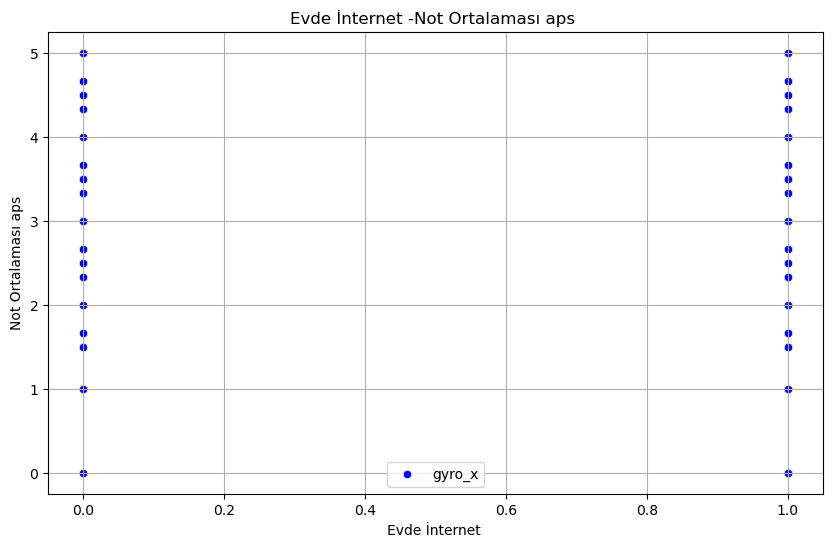

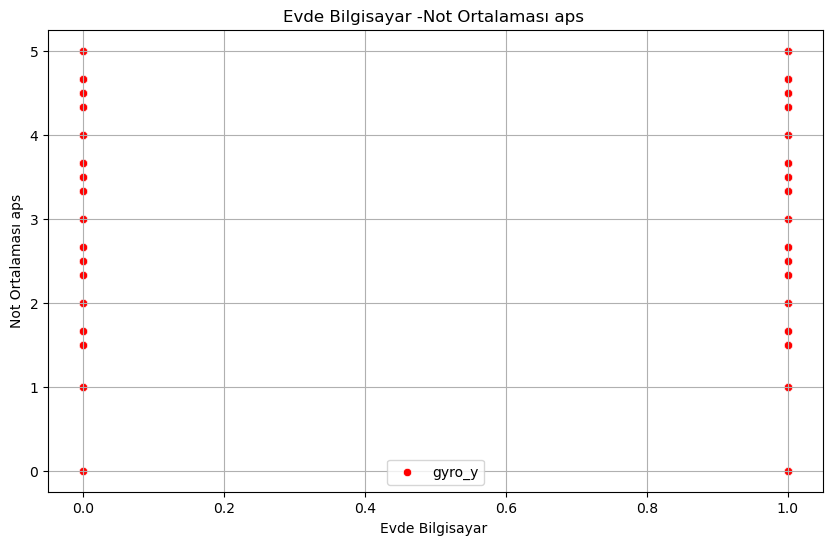

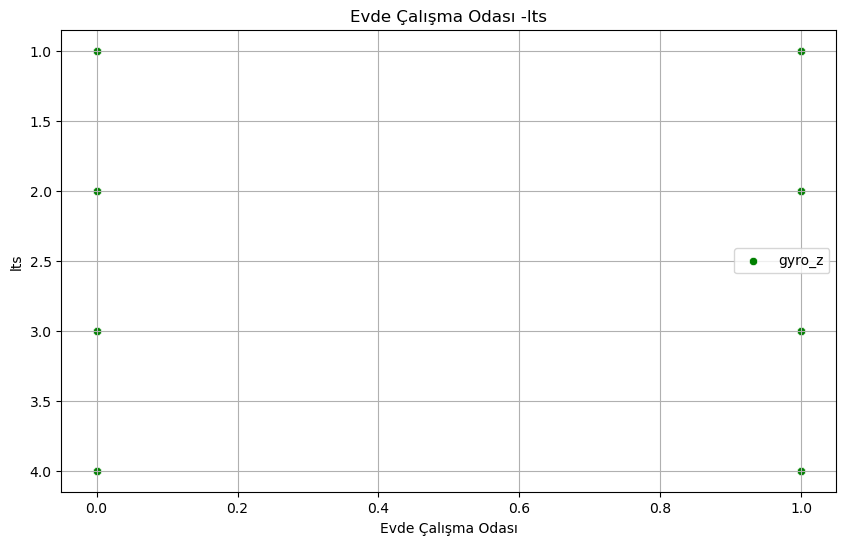

In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(data=yeni_data, x='Evde İnternet', y='Not Ortalaması aps', color='blue', label='gyro_x')

plt.title('Evde İnternet -Not Ortalaması aps ')
plt.xlabel('Evde İnternet ')
plt.ylabel('Not Ortalaması aps')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

sns.scatterplot(data=yeni_data, x='Evde Bilgisayar', y='Not Ortalaması aps', color='red', label='gyro_y')

plt.title('Evde Bilgisayar -Not Ortalaması aps ')
plt.xlabel('Evde Bilgisayar ')
plt.ylabel('Not Ortalaması aps')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

sns.scatterplot(data=yeni_data, x='Evde Çalışma Odası', y='lst', color='green', label='gyro_z')

plt.title('Evde Çalışma Odası -lts')
plt.xlabel('Evde Çalışma Odası')
plt.ylabel('lts')
plt.legend()
plt.grid(True)
plt.show()

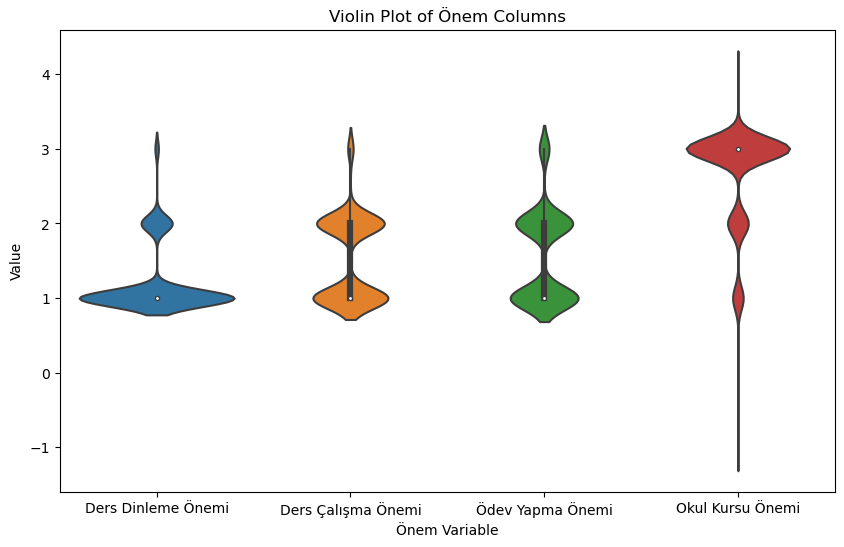

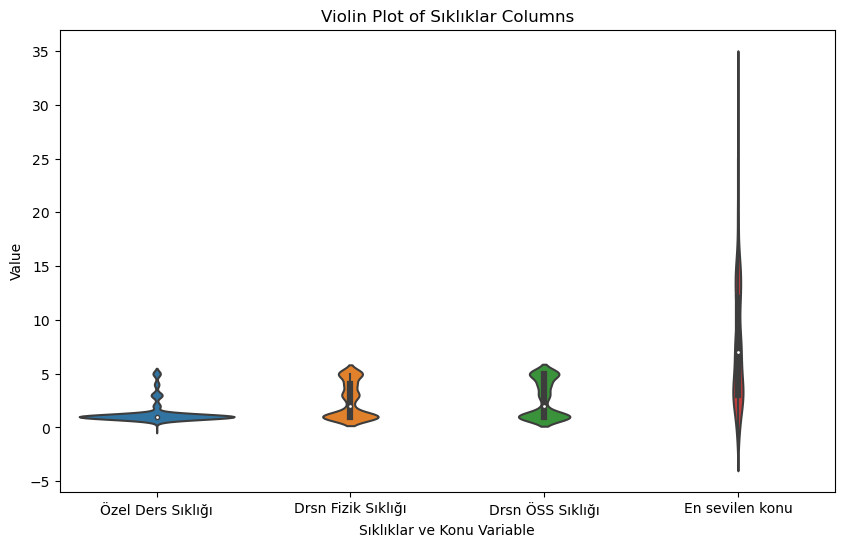

In [52]:
plt.figure(figsize=(10, 6))
gyro_columns = ['Ders Dinleme Önemi', 'Ders Çalışma Önemi', 'Ödev Yapma Önemi', 'Okul Kursu Önemi']
accel_columns = ['Özel Ders Sıklığı', 'Drsn Fizik Sıklığı', 'Drsn ÖSS Sıklığı','En sevilen konu']

sns.violinplot(data=yeni_data[gyro_columns])
plt.xlabel('Önem Variable')
plt.ylabel('Value')
plt.title('Violin Plot of Önem Columns')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=yeni_data[accel_columns])
plt.xlabel('Sıklıklar ve Konu Variable')
plt.ylabel('Value')
plt.title('Violin Plot of Sıklıklar Columns')
plt.show()

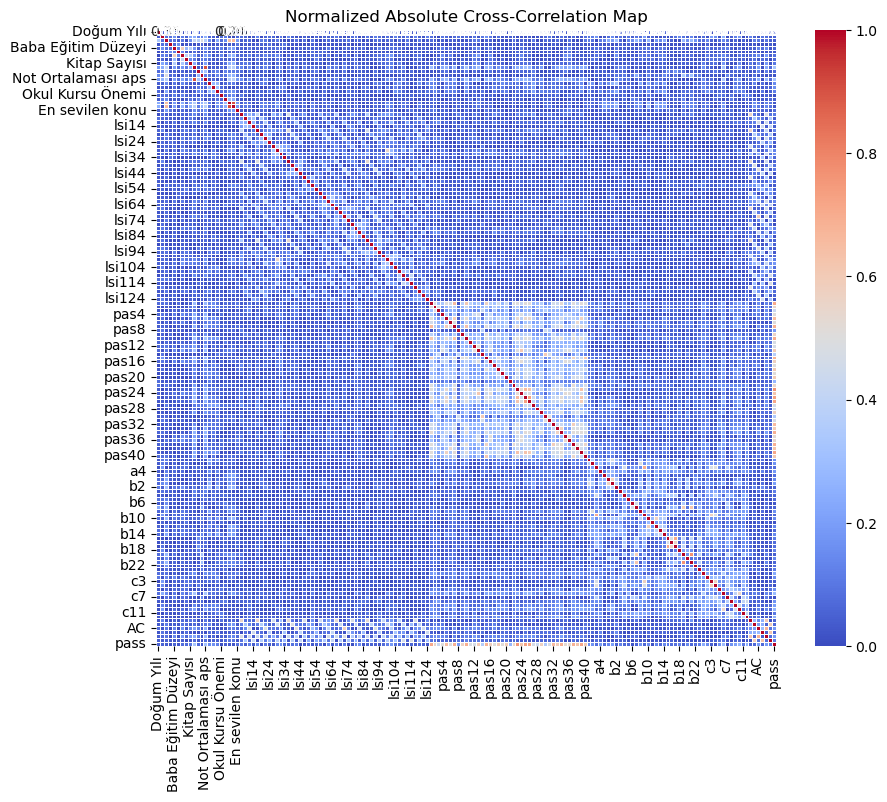

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

numeric_columns = yeni_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_columns.corr().abs()

normalized_corr_matrix = (corr_matrix - corr_matrix.min()) / (corr_matrix.max() - corr_matrix.min())

# Heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Normalized Absolute Cross-Correlation Map')
plt.show()


# 4) Standardization

In [ ]:
# Normalizasyon yapmadığımızda regresyon ve sınıflandırma sonuçları daha iyi çıkıyor.

# 5) Statistical Information

In [59]:
statistical_information = yeni_data.describe()

print(statistical_information)

       Doğum Yılı   Okul Türü  Sınıf Düzeyi  Baba Mesleği  Baba Eğitim Düzeyi  \
count  978.000000  978.000000    978.000000    978.000000          978.000000   
mean    90.524540    2.498978      9.943763     12.855828            3.873211   
std      2.848245    1.277512      0.748869      7.534749            1.206549   
min      9.000000    1.000000      9.000000      1.000000            0.000000   
25%     90.000000    1.000000      9.000000     10.250000            3.000000   
50%     91.000000    3.000000     10.000000     12.000000            4.000000   
75%     92.000000    3.000000     11.000000     16.000000            5.000000   
max     93.000000    5.000000     11.000000     52.000000           14.000000   

       Anne Mesleği  Anne Eğitim Düzeyi  Kardeş Sayısı  Kitap Sayısı  \
count    978.000000          978.000000     978.000000    978.000000   
mean      13.630879            3.124744       1.561350      3.154397   
std        4.963299            1.238574       0.925483

# 7) Classification

In [ ]:
# output : lst column

In [60]:
dataset_3 = yeni_data.copy()

In [61]:
cls_dataset = dataset_3.copy()

In [62]:
# lts outputu için kullanacağımız veri setinde Not ortalaması aps çıkarıyoruz

cls_dataset = cls_dataset.drop(columns = ['Not Ortalaması aps'])

In [63]:
cls_dataset = cls_dataset.drop(columns = ['pass'])

In [78]:
print(cls_dataset.shape)

(978, 160)


In [70]:
# knn
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd


X = cls_dataset.drop(columns=['lst'])
y = cls_dataset['lst']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=47)

knn_model = KNeighborsClassifier()


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=47)
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=skf, scoring='accuracy')

knn_avg_cv_scores = np.mean(knn_cv_scores)

print(" KNN Model - Avg Cross Validation Accuracy :" , knn_avg_cv_scores) 

 KNN Model - Avg Cross Validation Accuracy : 0.8951314508276533


In [71]:
# Descision Tree

decision_tree_model = DecisionTreeClassifier()

decision_tree_cv_scores = cross_val_score(decision_tree_model , X_train, y_train, cv=skf, scoring='accuracy')

decision_tree_avg_cv_scores = np.mean(decision_tree_cv_scores)

print(" Decision Model - Avg Cross Validation Accuracy :" , decision_tree_avg_cv_scores) 

 Decision Model - Avg Cross Validation Accuracy : 1.0


In [74]:
# Naive Bayes

naive_bayes_model =  GaussianNB()

naive_bayes_cv_scores = cross_val_score(naive_bayes_model , X_train, y_train, cv=skf, scoring='accuracy')

naive_bayes_avg_cv_scores = np.mean(naive_bayes_cv_scores)

print(" Naive Bayes Model - Avg Cross Validation Accuracy :" , naive_bayes_avg_cv_scores ) 

 Naive Bayes Model - Avg Cross Validation Accuracy : 0.7926647192469977


In [72]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest_model =  RandomForestClassifier()

random_forest_cv_scores = cross_val_score(random_forest_model , X_train, y_train, cv=skf, scoring='accuracy')

random_forest_avg_cv_scores = np.mean(random_forest_cv_scores)

print(" Random Forest Model - Avg Cross Validation Accuracy :" , random_forest_avg_cv_scores ) 

 Random Forest Model - Avg Cross Validation Accuracy : 0.9641350210970465


In [73]:
#Support Vector Machine
from sklearn.svm import SVC

svm_model =  SVC()

svm_model_cv_scores = cross_val_score(svm_model , X_train, y_train, cv=skf, scoring='accuracy')

svm_model_avg_cv_scores = np.mean(svm_model_cv_scores)

print(" SVM Model - Avg Cross Validation Accuracy :" , svm_model_avg_cv_scores ) 

 SVM Model - Avg Cross Validation Accuracy : 0.8618305744888023


In [75]:

models = ["KNN", "Decision Tree", "Naive Bayes", "Random Forest", "SVM"]
avg_cv_accuracies = [knn_avg_cv_scores, decision_tree_avg_cv_scores, naive_bayes_avg_cv_scores, random_forest_avg_cv_scores, svm_model_avg_cv_scores]


best_accuracy = max(avg_cv_accuracies)
best_model_index = avg_cv_accuracies.index(best_accuracy)
best_model = models[best_model_index]

print("BEST MODEL:", best_model)
print("BEST MODEL AVG CROSS VALIDATION SCORE:", best_accuracy)

BEST MODEL: Decision Tree
BEST MODEL AVG CROSS VALIDATION SCORE: 1.0


In [76]:
# Cross Validation model performansları

cv_performance = {  "Model": ["KNN", "Decision Tree","Naive Bayes","Random Forest", "SVM"],
                    "Avg Cross Validation Accuracy": [knn_avg_cv_scores , decision_tree_avg_cv_scores,
                                                       naive_bayes_avg_cv_scores , random_forest_avg_cv_scores,
                                                       svm_model_avg_cv_scores]
}
cv_performance_df = pd.DataFrame(cv_performance)

df_sorted = cv_performance_df.sort_values(by='Avg Cross Validation Accuracy', ascending=False)
df_sorted.reset_index(drop=True, inplace=True)
df_sorted.index += 1

display(df_sorted)

,Model,Avg Cross Validation Accuracy
1,Decision Tree,1.000000
2,Random Forest,0.964135
3,KNN,0.895131
4,SVM,0.861831
5,Naive Bayes,0.792665


In [77]:
# knn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

knn_model.fit(X_train, y_train)

# train accuracy
knn_train_accuracy = knn_model.score(X_train, y_train)
print("Train Accuracy (KNN):", knn_train_accuracy)
print()

# test accuracy
knn_test_accuracy = knn_model.score(X_test, y_test)
print("Test Accuracy (KNN):", knn_test_accuracy)
print()

# prediction
knn_test_predictions = knn_model.predict(X_test)


# Test seti için confusion matrix 
knn_test_conf_matrix = confusion_matrix(y_test, knn_test_predictions)
print("Test Confusion Matrix (KNN):\n", knn_test_conf_matrix)
print()

# Test seti için precision hesaplama
knn_test_precision = precision_score(y_test, knn_test_predictions, average='weighted')
print("Test Precision (KNN):", knn_test_precision)
print()

# Test seti için recall hesaplama
knn_test_recall = recall_score(y_test, knn_test_predictions, average='weighted')
print("Test  Recall (KNN):", knn_test_recall)
print()

# Test seti için F1-score hesaplama
knn_test_f1 = f1_score(y_test, knn_test_predictions, average='weighted')
print("Test  F1-score (KNN):", knn_test_f1)


Train Accuracy (KNN): 0.9552429667519181

Test Accuracy (KNN): 0.8775510204081632

Test Confusion Matrix (KNN):
 [[ 6  1  2  4]
 [ 0 11  1  1]
 [ 0  1 99  5]
 [ 1  0  8 56]]

Test Precision (KNN): 0.8765018994610831

Test  Recall (KNN): 0.8775510204081632

Test  F1-score (KNN): 0.8728071097070108


In [79]:
# Decision Tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

decision_tree_model.fit(X_train, y_train)

# train accuracy
dt_train_accuracy = decision_tree_model.score(X_train, y_train)
print("Train Accuracy (Decision Tree):", dt_train_accuracy)
print()

# test accuracy
dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Test Accuracy (Decision Tree):", dt_test_accuracy)
print()

# prediction
dt_test_predictions = decision_tree_model.predict(X_test)


# Test seti için confusion matrix 
dt_test_conf_matrix = confusion_matrix(y_test, dt_test_predictions)
print("Test Confusion Matrix (Decision Tree):\n", dt_test_conf_matrix)
print()

# Test seti için precision hesaplama
dt_test_precision = precision_score(y_test, dt_test_predictions, average='weighted')
print("Test Precision (Decision Tree):", dt_test_precision)
print()

# Test seti için recall hesaplama
dt_test_recall = recall_score(y_test, dt_test_predictions, average='weighted')
print("Test  Recall (Decision Tree):", dt_test_recall)
print()

# Test seti için F1-score hesaplama
dt_test_f1 = f1_score(y_test, dt_test_predictions, average='weighted')
print("Test  F1-score (Decision Tree)):", dt_test_f1)

Train Accuracy (Decision Tree): 1.0

Test Accuracy (Decision Tree): 1.0

Test Confusion Matrix (Decision Tree):
 [[ 13   0   0   0]
 [  0  13   0   0]
 [  0   0 105   0]
 [  0   0   0  65]]

Test Precision (Decision Tree): 1.0

Test  Recall (Decision Tree): 1.0

Test  F1-score (Decision Tree)): 1.0


In [80]:
# Naive Bayes
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

naive_bayes_model.fit(X_train, y_train)

# train accuracy
nb_train_accuracy = naive_bayes_model.score(X_train, y_train)
print("Train Accuracy (Naive Bayes):", nb_train_accuracy)
print()

# test accuracy
nb_test_accuracy = naive_bayes_model.score(X_test, y_test)
print("Test Accuracy (Naive Bayes):", nb_test_accuracy)
print()

# prediction
nb_test_predictions = naive_bayes_model.predict(X_test)

# Test seti için confusion matrix 
nb_test_conf_matrix = confusion_matrix(y_test, nb_test_predictions)
print("Test Confusion Matrix (Naive Bayes):\n", nb_test_conf_matrix)
print()

# Test seti için precision hesaplama
nb_test_precision = precision_score(y_test, nb_test_predictions, average='weighted')
print("Test Precision (Naive Bayes):", nb_test_precision)
print()

# Test seti için recall hesaplama
nb_test_recall = recall_score(y_test, nb_test_predictions, average='weighted')
print("Test  Recall (Naive Bayes):", nb_test_recall)
print()

# Test seti için F1-score hesaplama
nb_test_f1 = f1_score(y_test, nb_test_predictions, average='weighted')
print("Test  F1-score (Naive Bayes)):", nb_test_f1)

Train Accuracy (Naive Bayes): 0.850383631713555

Test Accuracy (Naive Bayes): 0.7908163265306123

Test Confusion Matrix (Naive Bayes):
 [[ 7  4  0  2]
 [ 2 11  0  0]
 [ 3  8 84 10]
 [ 5  4  3 53]]

Test Precision (Naive Bayes): 0.8419823868244616

Test  Recall (Naive Bayes): 0.7908163265306123

Test  F1-score (Naive Bayes)): 0.8065901360544219


In [81]:
# Random Forest
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

random_forest_model.fit(X_train, y_train)

# train accuracy
rf_train_accuracy = random_forest_model.score(X_train, y_train)
print("Train Accuracy (Random Forest)):", rf_train_accuracy)
print()

# test accuracy
rf_test_accuracy = random_forest_model.score(X_test, y_test)
print("Test Accuracy (Random Forest)):", rf_test_accuracy)
print()

# prediction
rf_test_predictions = random_forest_model.predict(X_test)


# Test seti için confusion matrix 
rf_test_conf_matrix = confusion_matrix(y_test, rf_test_predictions)
print("Test Confusion Matrix (Random Forest)):\n", rf_test_conf_matrix)
print()

# Test seti için precision hesaplama
rf_test_precision = precision_score(y_test, rf_test_predictions, average='weighted')
print("Test Precision (Random Forest)):", rf_test_precision)
print()

# Test seti için recall hesaplama
rf_test_recall = recall_score(y_test, rf_test_predictions, average='weighted')
print("Test  Recall (Random Forest)):", rf_test_recall)
print()

# Test seti için F1-score hesaplama
rf_test_f1 = f1_score(y_test, rf_test_predictions, average='weighted')
print("Test  F1-score (Random Forest)):", rf_test_f1)


Train Accuracy (Random Forest)): 1.0

Test Accuracy (Random Forest)): 0.9642857142857143

Test Confusion Matrix (Random Forest)):
 [[ 10   0   0   3]
 [  0  10   3   0]
 [  0   0 105   0]
 [  0   0   1  64]]

Test Precision (Random Forest)): 0.9654915368858757

Test  Recall (Random Forest)): 0.9642857142857143

Test  F1-score (Random Forest)): 0.9626346013267706


In [82]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_train_accuracy = svm_model.score(X_train, y_train)
print("Train Accuracy (SVM):", svm_train_accuracy)
print()

svm_test_accuracy = svm_model.score(X_test, y_test)
print("Test Accuracy (SVM):", svm_test_accuracy)
print()

svm_test_predictions = svm_model.predict(X_test)

svm_test_conf_matrix = confusion_matrix(y_test, svm_test_predictions)
print("Test Confusion Matrix (SVM):\n", svm_test_conf_matrix)
print()

svm_test_precision = precision_score(y_test, svm_test_predictions, average='weighted')
print("Test Precision (SVM):", svm_test_precision)
print()

svm_test_recall = recall_score(y_test, svm_test_predictions, average='weighted')
print("Test  Recall (SVM):", svm_test_recall)
print()

svm_test_f1 = f1_score(y_test, svm_test_predictions, average='weighted')
print("Test  F1-score (SVM):", svm_test_f1)
print()

Train Accuracy (SVM): 0.8797953964194374

Test Accuracy (SVM): 0.8877551020408163

Test Confusion Matrix (SVM):
 [[  5   1   1   6]
 [  0   7   6   0]
 [  0   0 105   0]
 [  0   0   8  57]]

Test Precision (SVM): 0.8931608357628765

Test  Recall (SVM): 0.8877551020408163

Test  F1-score (SVM): 0.8764260912698413



In [83]:
import pandas as pd

def format_float(val):
    return "{:.15f}".format(val)

model_performanslar = {
    "Model": ["KNN", "Decision Tree", "Naive Bayes", "Random Forest", "SVM"],
    "Avg Cross Validation Score": [knn_avg_cv_scores, decision_tree_avg_cv_scores, naive_bayes_avg_cv_scores,
                                      random_forest_avg_cv_scores, svm_model_avg_cv_scores],
    "Test Accuracy": [knn_test_accuracy, dt_test_accuracy, nb_test_accuracy, rf_test_accuracy, svm_test_accuracy],
    "Train Accuracy": [knn_train_accuracy, dt_train_accuracy, nb_train_accuracy, rf_train_accuracy, svm_train_accuracy],
    "Precision": [knn_test_precision, dt_test_precision, nb_test_precision, rf_test_precision, svm_test_precision],
    "Recall": [knn_test_recall, dt_test_recall, nb_test_recall, rf_test_recall, svm_test_recall],
    "F1-score": [knn_test_f1, dt_test_f1, nb_test_f1, rf_test_f1, svm_test_f1]
}


model_performanslar_df = pd.DataFrame(model_performanslar)


model_performanslar_df['Avg Cross Validation Score'] = model_performanslar_df['Avg Cross Validation Score'].apply(format_float)
model_performanslar_df['Test Accuracy'] = model_performanslar_df['Test Accuracy'].apply(format_float)
model_performanslar_df['Train Accuracy'] = model_performanslar_df['Train Accuracy'].apply(format_float)
model_performanslar_df['Precision'] = model_performanslar_df['Precision'].apply(format_float)
model_performanslar_df['Recall'] = model_performanslar_df['Recall'].apply(format_float)
model_performanslar_df['F1-score'] = model_performanslar_df['F1-score'].apply(format_float)

# Accuracy'ye göre sıralama
model_performanslar_df_sorted = model_performanslar_df.sort_values(by='Test Accuracy', ascending=False)
model_performanslar_df_sorted.reset_index(drop=True, inplace=True)
model_performanslar_df_sorted.index += 1

print(model_performanslar_df_sorted)

           Model Avg Cross Validation Score      Test Accuracy  \
1  Decision Tree          1.000000000000000  1.000000000000000   
2  Random Forest          0.964135021097047  0.964285714285714   
3            SVM          0.861830574488802  0.887755102040816   
4            KNN          0.895131450827653  0.877551020408163   
5    Naive Bayes          0.792664719246998  0.790816326530612   

      Train Accuracy          Precision             Recall           F1-score  
1  1.000000000000000  1.000000000000000  1.000000000000000  1.000000000000000  
2  1.000000000000000  0.965491536885876  0.964285714285714  0.962634601326771  
3  0.879795396419437  0.893160835762877  0.887755102040816  0.876426091269841  
4  0.955242966751918  0.876501899461083  0.877551020408163  0.872807109707011  
5  0.850383631713555  0.841982386824462  0.790816326530612  0.806590136054422  


In [84]:
#  Accuracy 1 çıkarak en iyi model Decision Tree oldu.
#  Random Forest da decision treeden sonra en yüksek accuracy elde ettiğimiz model oldu ama overfitting.
#  SVM ve KNN modelleri de oldukça iyi performans gösteriyor, ancak decisiontree ve random foresttan biraz daha düşük.Bu modeller 
# daha dengeli bir performans sergiliyor gibi görünüyor.

# Naive Bayes modeli ise diğerlerine kıyasla daha düşük bir performans sergiliyor.

# 8) Regression

In [90]:
# output sütunu : Not Ortalaması Aps

In [96]:
reg_veri = dataset_3.copy()

In [97]:
# Not Ortalaması Aps  outputu için kullanacağımız veri setinde lts ve pass'i  çıkarıyoruz

reg_veri = reg_veri.drop(columns = ['pass'])
reg_veri = reg_veri.drop(columns = ['lst'])

In [99]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd

X = reg_veri.drop(columns=['Not Ortalaması aps'])
y = reg_veri['Not Ortalaması aps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

knn_model = KNeighborsRegressor()

kf = KFold(n_splits=10, shuffle=True, random_state=47)
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='r2')

knn_avg_cv_scores = np.mean(knn_cv_scores)

print("KNN Model - Avg Cross Validation R^2 Score:", knn_avg_cv_scores)



KNN Model - Avg Cross Validation R^2 Score: 0.16014175425362412


In [100]:
# decision tree
from sklearn.tree import DecisionTreeRegressor


decision_tree_model = DecisionTreeRegressor()


decision_tree_cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=kf, scoring='r2')


decision_tree_avg_cv_scores = np.mean(decision_tree_cv_scores)


print("Decision Tree Model - Avg Cross Validation R^2 Score:", decision_tree_avg_cv_scores)


Decision Tree Model - Avg Cross Validation R^2 Score: 0.930018854238855


In [101]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor()


random_forest_cv_scores = cross_val_score(random_forest_model , X_train, y_train, cv=kf, scoring='r2')


random_forest_avg_cv_scores = np.mean(random_forest_cv_scores)


print("Random Forest Model - Avg Cross Validation R^2 Score:", random_forest_avg_cv_scores)


Random Forest Model - Avg Cross Validation R^2 Score: 0.9682080931775247


In [102]:
from sklearn.svm import SVR


svm_model = SVR()


svm_model_cv_scores = cross_val_score(svm_model , X_train, y_train, cv=kf, scoring='r2')


svm_model_avg_cv_scores = np.mean(svm_model_cv_scores)

print("SVM Model - Avg Cross Validation R^2 Score:", svm_model_avg_cv_scores)


SVM Model - Avg Cross Validation R^2 Score: 0.3865129147632541


In [104]:

reg_models = ["KNN", "Decision Tree", "Random Forest", "SVM"]
avg_cv_r2 = [knn_avg_cv_scores, decision_tree_avg_cv_scores, random_forest_avg_cv_scores, svm_model_avg_cv_scores]

# En yüksek çapraz doğrulama doğruluğunu ve bu doğruluğa sahip modelin indeksini bulma
best_r2 = max(avg_cv_r2)
best_model_index = avg_cv_accuracies.index(best_accuracy)
best_model = reg_models[best_model_index]

print("BEST MODEL:", best_model)
print("BEST MODEL AVG CROSS VALIDATION R^2 SCORE:", best_r2)

BEST MODEL: Decision Tree
BEST MODEL AVG CROSS VALIDATION R^2 SCORE: 0.9682080931775247


In [110]:
# Cross Validation model performansları

reg_cv_performance = {  
    "Model": ["KNN", "Decision Tree", "Random Forest", "SVM"],
    "Avg Cross Validation R^2": [knn_avg_cv_scores, decision_tree_avg_cv_scores, 
                                  random_forest_avg_cv_scores, svm_model_avg_cv_scores]
}

reg_cv_performance_df = pd.DataFrame(reg_cv_performance)

df_sorted = reg_cv_performance_df.sort_values(by='Avg Cross Validation R^2', ascending=False)
df_sorted.reset_index(drop=True, inplace=True)
df_sorted.index += 1

display(df_sorted)


,Model,Avg Cross Validation R^2
1,Random Forest,0.968208
2,Decision Tree,0.930019
3,SVM,0.386513
4,KNN,0.160142


In [113]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

knn_model.fit(X_train, y_train)

knn_train_predictions = knn_model.predict(X_train)


knn_test_predictions = knn_model.predict(X_test)


#Train seti için R^2 
knn_train_r2_score = r2_score(y_train, knn_train_predictions)
print("Train R^2 Score (KNN Regression):", knn_train_r2_score)

#Test seti için R^2 
knn_test_r2_score = r2_score(y_test, knn_test_predictions)
print("Test R^2 Score (KNN Regression):", knn_test_r2_score)



# Test seti için ortalama karesel hata (MSE) hesaplama
knn_test_mse = mean_squared_error(y_test, knn_test_predictions)
print("Test Mean Squared Error (KNN Regression):", knn_test_mse)



# Test seti için kök ortalama karesel hata (RMSE) hesaplama
knn_test_rmse = np.sqrt(knn_test_mse)
print("Test Root Mean Squared Error (KNN Regression):", knn_test_rmse)



# Test seti için ortalama mutlak hata (MAE) hesaplama
knn_test_mae = mean_absolute_error(y_test, knn_test_predictions)
print("Test Mean Absolute Error (KNN Regression):", knn_test_mae)

Train R^2 Score (KNN Regression): 0.4676239183770635
Test R^2 Score (KNN Regression): 0.1516759670491611
Test Mean Squared Error (KNN Regression): 1.0243877551020406
Test Root Mean Squared Error (KNN Regression): 1.0121204251975358
Test Mean Absolute Error (KNN Regression): 0.8166666666666667


In [114]:
from sklearn.tree import DecisionTreeRegressor


decision_tree_model.fit(X_train, y_train)

tree_train_predictions = decision_tree_model.predict(X_train)

tree_test_predictions = decision_tree_model.predict(X_test)

#Eğitim seti için R^2 
tree_train_r2_score = r2_score(y_train, tree_train_predictions)
print("Train R^2 Score (Decision Tree Regression):", tree_train_r2_score)

#Test seti için R^2 
tree_test_r2_score = r2_score(y_test, tree_test_predictions)
print("Test R^2 Score (Decision Tree Regression):", tree_test_r2_score)

#Test seti için ortalama karesel hata (MSE) hesapla
tree_test_mse = mean_squared_error(y_test, tree_test_predictions)
print("Test Mean Squared Error (Decision Tree Regression):", tree_test_mse)

# Test seti için kök ortalama karesel hata (RMSE) hesapla
tree_test_rmse = np.sqrt(tree_test_mse)
print("Test Root Mean Squared Error (Decision Tree Regression):", tree_test_rmse)

# Test seti için ortalama mutlak hata (MAE) hesapla
tree_test_mae = mean_absolute_error(y_test, tree_test_predictions)
print("Test Mean Absolute Error (Decision Tree Regression):", tree_test_mae)


Train R^2 Score (Decision Tree Regression): 1.0
Test R^2 Score (Decision Tree Regression): 0.9494156597323478
Test Mean Squared Error (Decision Tree Regression): 0.061082766439909314
Test Root Mean Squared Error (Decision Tree Regression): 0.2471492796669845
Test Mean Absolute Error (Decision Tree Regression): 0.08418367346938778


In [115]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model.fit(X_train, y_train)

rf_train_predictions = random_forest_model.predict(X_train)

rf_test_predictions = random_forest_model.predict(X_test)

# Eğitim seti için R^2 
rf_train_r2_score = r2_score(y_train, rf_train_predictions)
print("Train R^2 Score (Random Forest Regression):", rf_train_r2_score)

# Test seti için R^2 
rf_test_r2_score = r2_score(y_test, rf_test_predictions)
print("Test R^2 Score (Random Forest Regression):", rf_test_r2_score)

# Test seti için ortalama karesel hata (MSE) hesapla
rf_test_mse = mean_squared_error(y_test, rf_test_predictions)
print("Test Mean Squared Error (Random Forest Regression):", rf_test_mse)

# Test seti için kök ortalama karesel hata (RMSE) hesapla
rf_test_rmse = np.sqrt(rf_test_mse)
print("Test Root Mean Squared Error (Random Forest Regression):", rf_test_rmse)

# Test seti için ortalama mutlak hata (MAE) hesapla
rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)
print("Test Mean Absolute Error (Random Forest Regression):", rf_test_mae)


Train R^2 Score (Random Forest Regression): 0.996084240664344
Test R^2 Score (Random Forest Regression): 0.9725701661613781
Test Mean Squared Error (Random Forest Regression): 0.03312270408163264
Test Root Mean Squared Error (Random Forest Regression): 0.18199643974988258
Test Mean Absolute Error (Random Forest Regression): 0.08935374149659871


In [116]:
#svm
from sklearn.svm import SVR

svm_model.fit(X_train, y_train)


svm_train_predictions = svm_model.predict(X_train)


svm_test_predictions = svm_model.predict(X_test)

#Eğitim seti için R^2 
svm_train_r2_score = r2_score(y_train, svm_train_predictions)
print("Train R^2 Score (SVM Regression):", svm_train_r2_score)

# Test seti için R^2 
svm_test_r2_score = r2_score(y_test, svm_test_predictions)
print("Test R^2 Score (SVM Regression):", svm_test_r2_score)

#Test seti için ortalama karesel hata (MSE) hesapla
svm_test_mse = mean_squared_error(y_test, svm_test_predictions)
print("Test Mean Squared Error (SVM Regression):", svm_test_mse)

# Test seti için kök ortalama karesel hata (RMSE) hesapla
svm_test_rmse = np.sqrt(svm_test_mse)
print("Test Root Mean Squared Error (SVM Regression):", svm_test_rmse)

# Test seti için ortalama mutlak hata (MAE) hesapla
svm_test_mae = mean_absolute_error(y_test, svm_test_predictions)
print("Test Mean Absolute Error (SVM Regression):", svm_test_mae)


Train R^2 Score (SVM Regression): 0.44915868696382355
Test R^2 Score (SVM Regression): 0.38898993013940164
Test Mean Squared Error (SVM Regression): 0.7378209381055123
Test Root Mean Squared Error (SVM Regression): 0.8589650389308707
Test Mean Absolute Error (SVM Regression): 0.7010578282399302


In [118]:
import pandas as pd

def format_float(val):
    return "{:.15f}".format(val)

reg_model_performanslar = {
    "Model": ["KNN", "Decision Tree","Random Forest", "SVM"],
    "Avg Cross Validation R^2": [knn_avg_cv_scores, decision_tree_avg_cv_scores, 
                                  random_forest_avg_cv_scores, svm_model_avg_cv_scores],    
    "Test R^2 Score": [ knn_test_r2_score, tree_test_r2_score, rf_test_r2_score, svm_test_r2_score],
    "Train R^2 Score": [ knn_train_r2_score, tree_train_r2_score, rf_train_r2_score, svm_train_r2_score],
    "Mean Squared Error": [ knn_test_mse, tree_test_mse, rf_test_mse, svm_test_mse],
    "Root Mean Squared Error": [ knn_test_rmse, tree_test_rmse, rf_test_rmse, svm_test_rmse],
    "Mean Absolute Error": [ knn_test_mae,  tree_test_mae, rf_test_mae, svm_test_mae]
}


reg_model_performanslar_df = pd.DataFrame(reg_model_performanslar)


reg_model_performanslar_df['Avg Cross Validation R^2'] = reg_model_performanslar_df['Avg Cross Validation R^2'].apply(format_float)
reg_model_performanslar_df['Test R^2 Score'] = reg_ model_performanslar_df['Test R^2 Score'].apply(format_float)
reg_model_performanslar_df['Train Accuracy'] = reg_model_performanslar_df['Train Accuracy'].apply(format_float)
reg_model_performanslar_df['Train R^2 Score'] = reg_model_performanslar_df['Train R^2 Score'].apply(format_float)
reg_model_performanslar_df['Root Mean Squared Error'] = reg_model_performanslar_df['Root Mean Squared Error'].apply(format_float)
reg_model_performanslar_df['"Mean Absolute Error'] = reg_model_performanslar_df['"Mean Absolute Error'].apply(format_float)

# Accuracy'ye göre sıralama
reg_model_performanslar_df_sorted = reg_model_performanslar_df.sort_values(by='Test R^2 Score', ascending=False)
Test R^2 Scoremodel_performanslar_df_sorted.reset_index(drop=True, inplace=True)
Test R^2 Scoremodel_performanslar_df_sorted.index += 1

print(Test R^2 Scoremodel_performanslar_df_sorted)

SyntaxError: invalid syntax (1238212815.py, line 22)

In [120]:
import pandas as pd

def format_float(val):
    return "{:.15f}".format(val)

reg_model_performances = {
    "Model": ["KNN", "Decision Tree", "Random Forest", "SVM"],
    "Average Cross-Validation R^2": [knn_avg_cv_scores, decision_tree_avg_cv_scores, 
                                      random_forest_avg_cv_scores, svm_model_avg_cv_scores],    
    "Test R^2 Score": [knn_test_r2_score, tree_test_r2_score, rf_test_r2_score, svm_test_r2_score],
    "Training R^2 Score": [knn_train_r2_score, tree_train_r2_score, rf_train_r2_score, svm_train_r2_score],
    "Mean Squared Error": [knn_test_mse, tree_test_mse, rf_test_mse, svm_test_mse],
    "Root Mean Squared Error": [knn_test_rmse, tree_test_rmse, rf_test_rmse, svm_test_rmse],
    "Mean Absolute Error": [knn_test_mae,  tree_test_mae, rf_test_mae, svm_test_mae]
}

reg_model_performances_df = pd.DataFrame(reg_model_performances)

reg_model_performances_df['Average Cross-Validation R^2'] = reg_model_performances_df['Average Cross-Validation R^2'].apply(format_float)
reg_model_performances_df['Test R^2 Score'] = reg_model_performances_df['Test R^2 Score'].apply(format_float)
reg_model_performances_df['Training R^2 Score'] = reg_model_performances_df['Training R^2 Score'].apply(format_float)
reg_model_performances_df['Root Mean Squared Error'] = reg_model_performances_df['Root Mean Squared Error'].apply(format_float)
reg_model_performances_df['Mean Absolute Error'] = reg_model_performances_df['Mean Absolute Error'].apply(format_float)

# Sorting by Test R^2 Score
reg_model_performances_df_sorted = reg_model_performances_df.sort_values(by='Test R^2 Score', ascending=False)
reg_model_performances_df_sorted.reset_index(drop=True, inplace=True)
reg_model_performances_df_sorted.index += 1

print(reg_model_performances_df_sorted)



           Model Average Cross-Validation R^2     Test R^2 Score  \
1  Random Forest            0.968208093177525  0.972570166161378   
2  Decision Tree            0.930018854238855  0.949415659732348   
3            SVM            0.386512914763254  0.388989930139402   
4            KNN            0.160141754253624  0.151675967049161   

  Training R^2 Score  Mean Squared Error Root Mean Squared Error  \
1  0.996084240664344            0.033123       0.181996439749883   
2  1.000000000000000            0.061083       0.247149279666984   
3  0.449158686963824            0.737821       0.858965038930871   
4  0.467623918377064            1.024388       1.012120425197536   

  Mean Absolute Error  
1   0.089353741496599  
2   0.084183673469388  
3   0.701057828239930  
4   0.816666666666667  


In [ ]:
# BEST MODEL:  RANDOM FOREST: 
#  Cross-Validation R^2 değeri oldukça yüksek (0.968), bu da modelin genelleme yeteneğinin güçlü olduğunu gösteriyor.
# R^2 Skoru, verilerin yaklaşık %97'sinin bu model tarafından açıklanabildiğini gösteriyor, 
#yani modelin test veri setinde iyi bir performans sergilediğini gösteriyor.
# ^2 Skoru test skorundan biraz daha yüksek, bu da modelin eğitim veri setine aşırı uyum sağladığını gösterebilir, 
#ancak genel olarak yüksek bir doğruluk sağladığını belirtmek önemlidir.
# Mean Squared Error ve Root Mean Squared Error oldukça düşüktür, 
#bu da modelin tahminlerinin gerçek değerlere ne kadar yakın olduğunu gösterir.

In [ ]:
# decısıon tree:
# Eandom Forest'a kıyasla daha düşük bir Cross-Validation R^2 değeri vardır, ancak yine de oldukça yüksektir (0.930).
#R^2 Skoru yüksektir, bu da modelin test veri setinde iyi bir performans sergilediğini gösterir.
# R^2 Skoru (1.0), bu da modelin eğitim veri setine aşırı uyum sağladığını gösterir.
#Mean Squared Error ve Root Mean Squared Error Random Forest'a göre biraz daha yüksektir, ancak yine de kabul edilebilir seviyededir.

In [ ]:
# SVM
# Average Cross-Validation R^2 ldukça düşüktür (0.387), bu da modelin genelleme yeteneğinin zayıf olduğunu gösterebilir.
# R^2 Skoru çok düşüktür, bu da modelin test veri setinde zayıf bir performans sergilediğini gösterir.
#Mean Squared Error ve Root Mean Squared Error Random, modelin tahminlerinin gerçek değerlerden oldukça uzak olduğunu gösterir.
#Mean Absolute Error, modelin tahminlerinin genellikle gerçek değerlerden oldukça uzak olduğunu gösterir.

In [121]:
# KNN
# Average Cross-Validation R^2 ve R^2 Skoru oldukça düşüktür,
#bu da modelin genelleme yeteneğinin ve test veri setindeki performansının zayıf olduğunu gösterir.